In [15]:
import pandas as pd
import pylab as plt
import seaborn as sns
import numpy as np
from sklearn.utils import resample

In [2]:
data=pd.read_csv('../../data/onlinefraud.csv')

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [9]:
data['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [4]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

## Columns and their descriptions:

**step**: Represents a unit of time where 1 step equals 1 hour

**type**:Type of online transaction

**amount**: The amount of the transaction

**nameOrig**: Customer starting the transaction

**oldbalanceOrg**: Balance before the transaction

**newbalanceOrig**: Balance after the transaction

**nameDest**: Recipient of the transaction

**oldbalanceDest**: Initial balance of recipient before the transaction

**newbalanceDest**: The new balance of recipient after the transaction

**isFraud**: Is it a fraud transaction? (0 for no 1 for yes)

**isFlaggedFraud**: Was the transaction flagged as fraud? (0 for no 1 for yes)


In [5]:
data.shape

(6362620, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


I will need to transform the columns with type 'object' to numerical since machine learning models only accept numeric data

In [7]:
data.duplicated().any()

False

No duplicated rows

In [8]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

No nulls in the dataset

In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [10]:
data['type'].value_counts()  
#I will convert this to numerical later on. There are only 5 unique values in this column so it shouldn´t be a problem

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [11]:
data['nameOrig'].value_counts() 
#there are too many unique values in this column. I cannot convert it to numerical. I will delete it 

C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64

In [12]:
data['nameDest'].value_counts()
#there are too many unique values in this column. I cannot convert it to numerical. I will delete it 

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

In [13]:
data=data.drop(['nameOrig', 'nameDest'], axis=1)

In [14]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


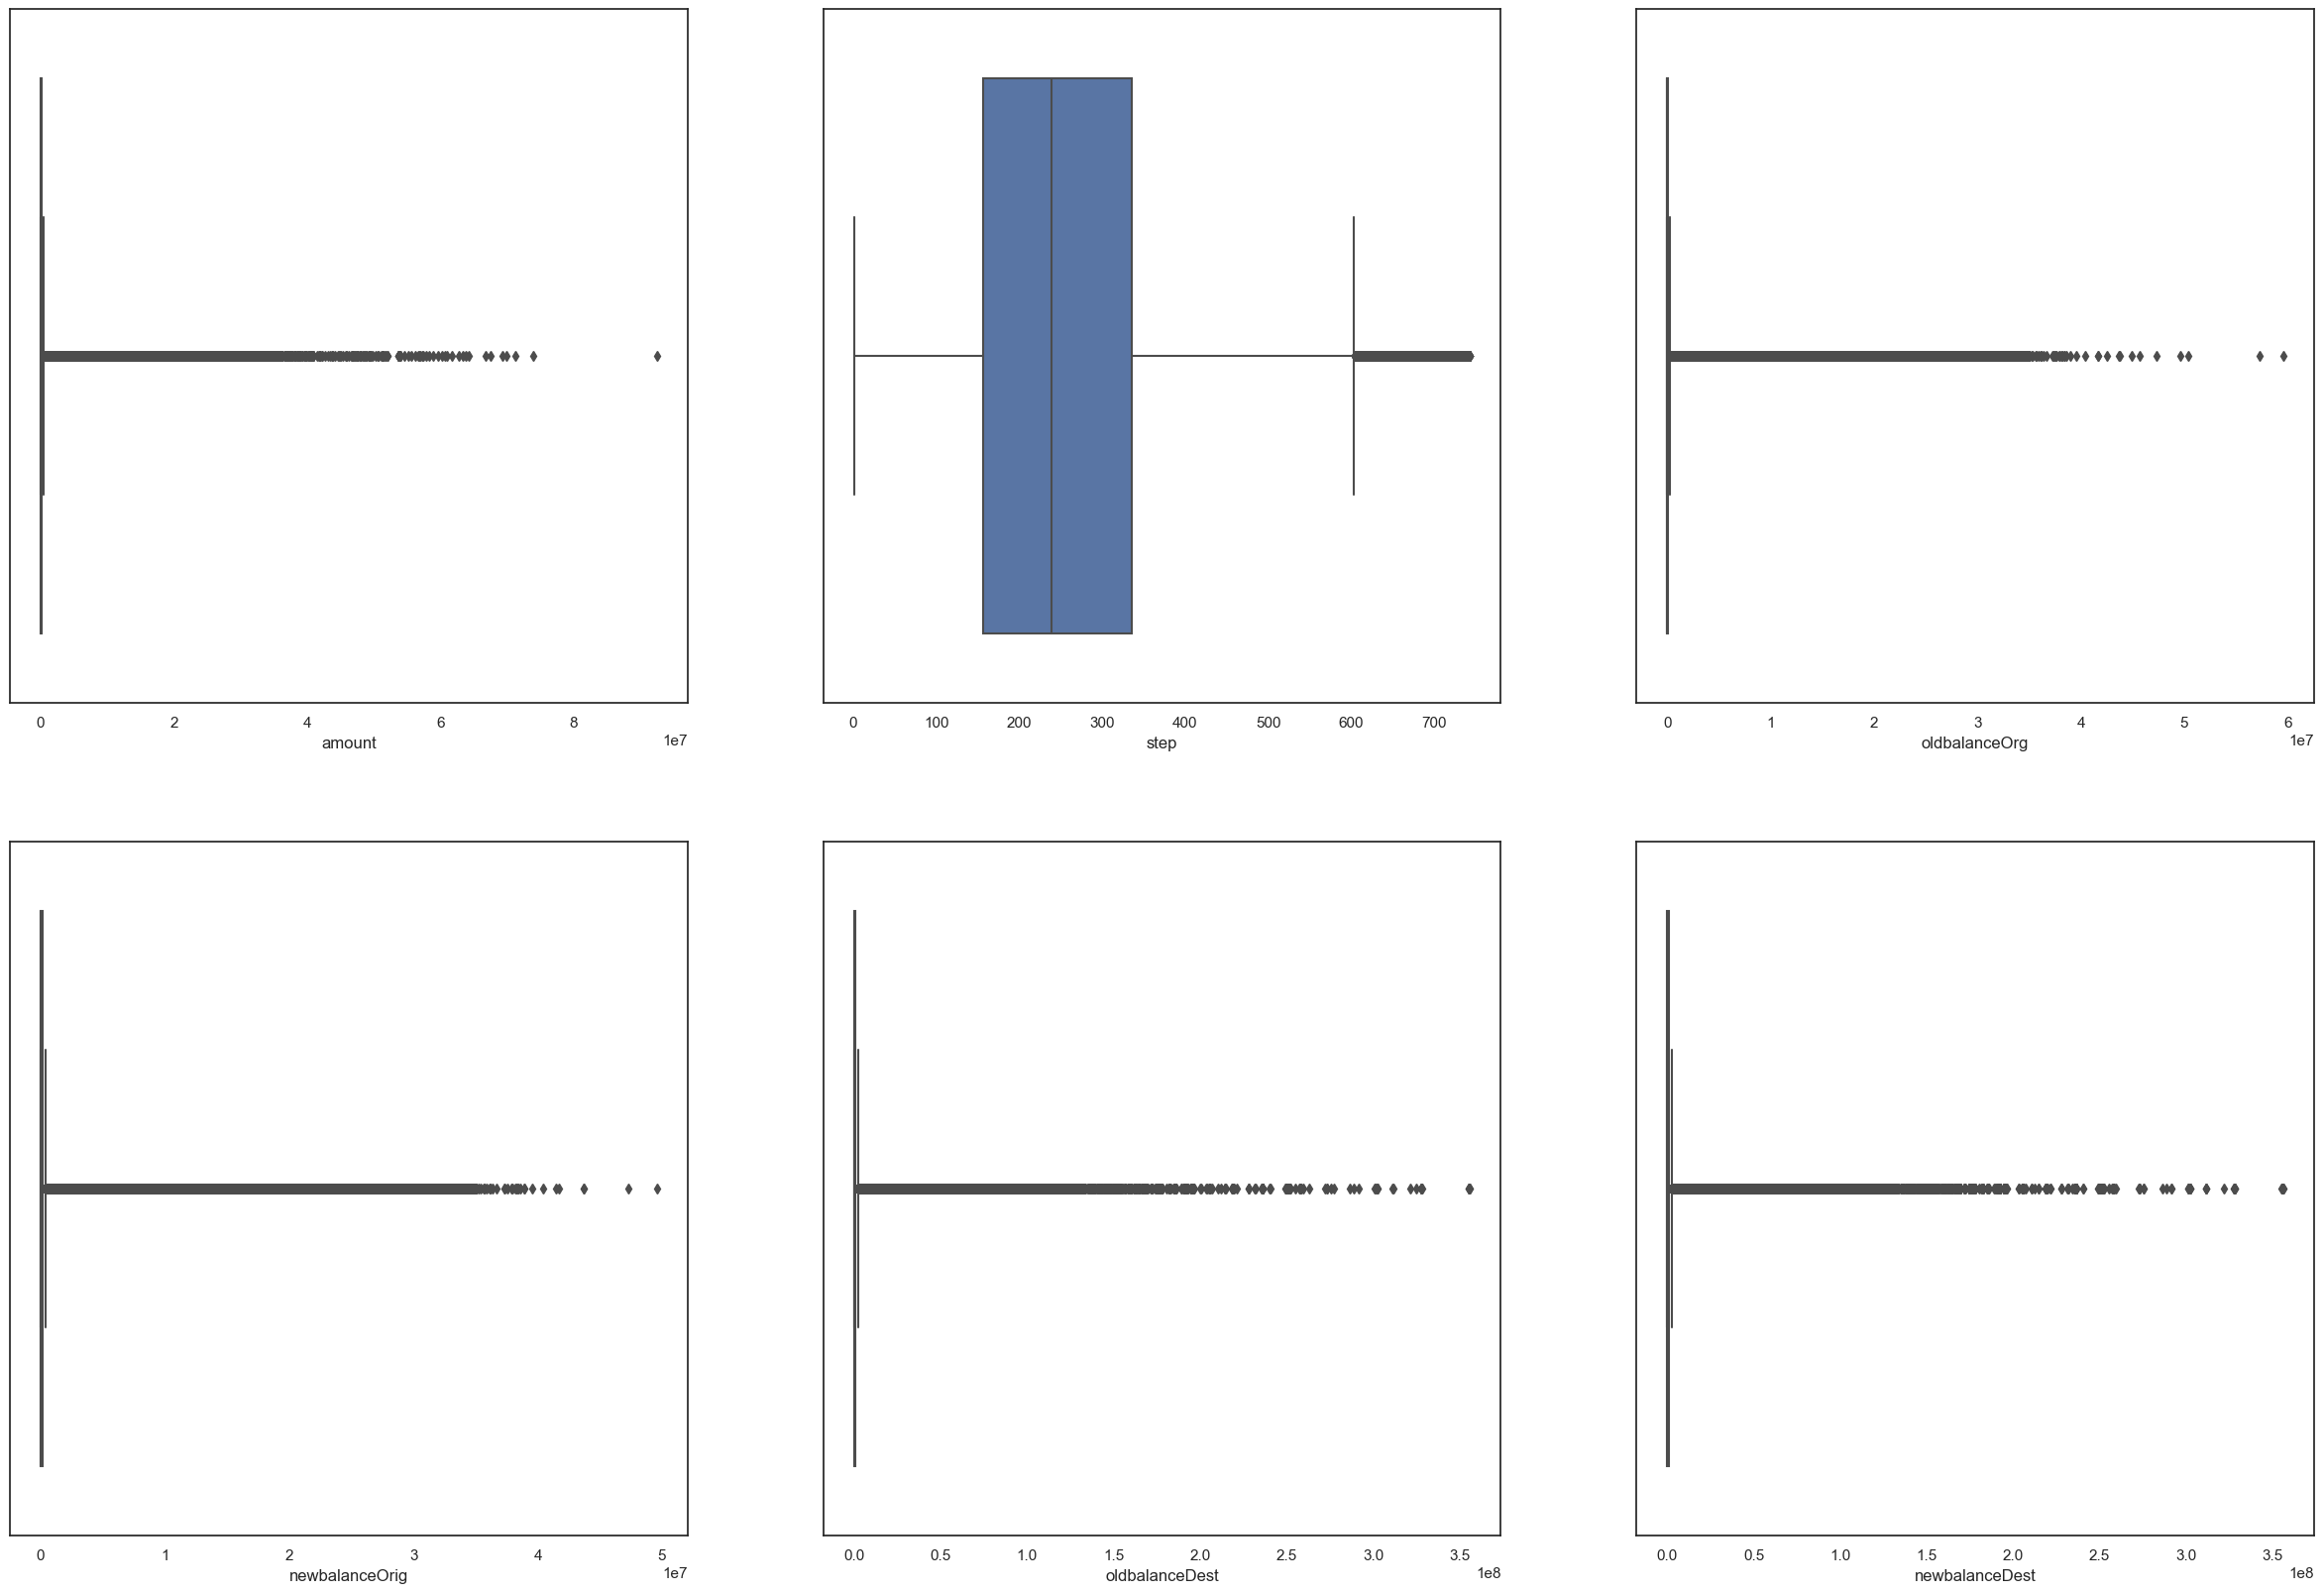

In [20]:
#checking the outliers
fig, ax = plt.subplots(2, 3, figsize=(30, 20))
df = data[['amount', 'step', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]

ax = ax.flatten()

for i in range(len(df.columns)):
    sns.boxplot(x=df.columns[i], data=df, ax=ax[i])

plt.show()


Above are the boxplots for the outliers for the numerical non-binary columns. There are quite a few of them. I will experiment with removing them and not, to see what works the best. 

In [21]:
def detect_outliers(list_columns, dataframe): 
    
    dicc_indices = {} 
    
    for col in list_columns:
        
        Q1 = np.nanpercentile(data[col], 25)
        Q3 = np.nanpercentile(data[col], 75)
        
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0:  
        
            dicc_indices[col] = (list(outliers_data.index)) 
        

    
    return dicc_indices 

In [22]:
list_columns=['amount', 'step', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
outliers_ind=detect_outliers(list_columns,data)
outliers_ind

{'amount': [85,
  86,
  88,
  89,
  93,
  94,
  95,
  96,
  132,
  210,
  289,
  345,
  358,
  359,
  360,
  362,
  365,
  373,
  374,
  375,
  376,
  377,
  378,
  379,
  380,
  382,
  383,
  411,
  465,
  552,
  656,
  695,
  794,
  795,
  797,
  798,
  800,
  801,
  802,
  830,
  841,
  842,
  865,
  969,
  970,
  986,
  1077,
  1153,
  1154,
  1156,
  1157,
  1158,
  1159,
  1162,
  1163,
  1164,
  1202,
  1206,
  1207,
  1209,
  1211,
  1213,
  1214,
  1227,
  1228,
  1229,
  1231,
  1433,
  1699,
  1703,
  1718,
  1719,
  1783,
  1785,
  1786,
  1787,
  1788,
  1789,
  1791,
  1818,
  1819,
  1823,
  1837,
  1844,
  1862,
  1908,
  2149,
  2159,
  2188,
  2213,
  2223,
  2247,
  2291,
  2338,
  2487,
  2504,
  2523,
  2566,
  2586,
  2587,
  2588,
  2591,
  2593,
  2595,
  2755,
  2895,
  3059,
  3060,
  3162,
  3163,
  3313,
  3341,
  3342,
  3344,
  3345,
  3346,
  3350,
  3351,
  3353,
  3354,
  3557,
  3558,
  3560,
  3561,
  3562,
  3563,
  3567,
  3570,
  3573,
  3574,
  36

In [23]:
to_drop = list(outliers_ind.values())   #converting the dictionary of the outliers to a list of lists
ind_to_drop = [index for slist in to_drop for index in slist] # converting the list of lists to a list
ind_to_drop=set(ind_to_drop) # converting the list to a set (getting only the unique values)
len(ind_to_drop)  # there are a lot of outliers 

2040727

C:\Users\akoun\AppData\Local\Temp\ipykernel_12528\4005752301.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask=np.triu(np.ones_like(data.corr(), dtype=bool))
C:\Users\akoun\AppData\Local\Temp\ipykernel_12528\4005752301.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),


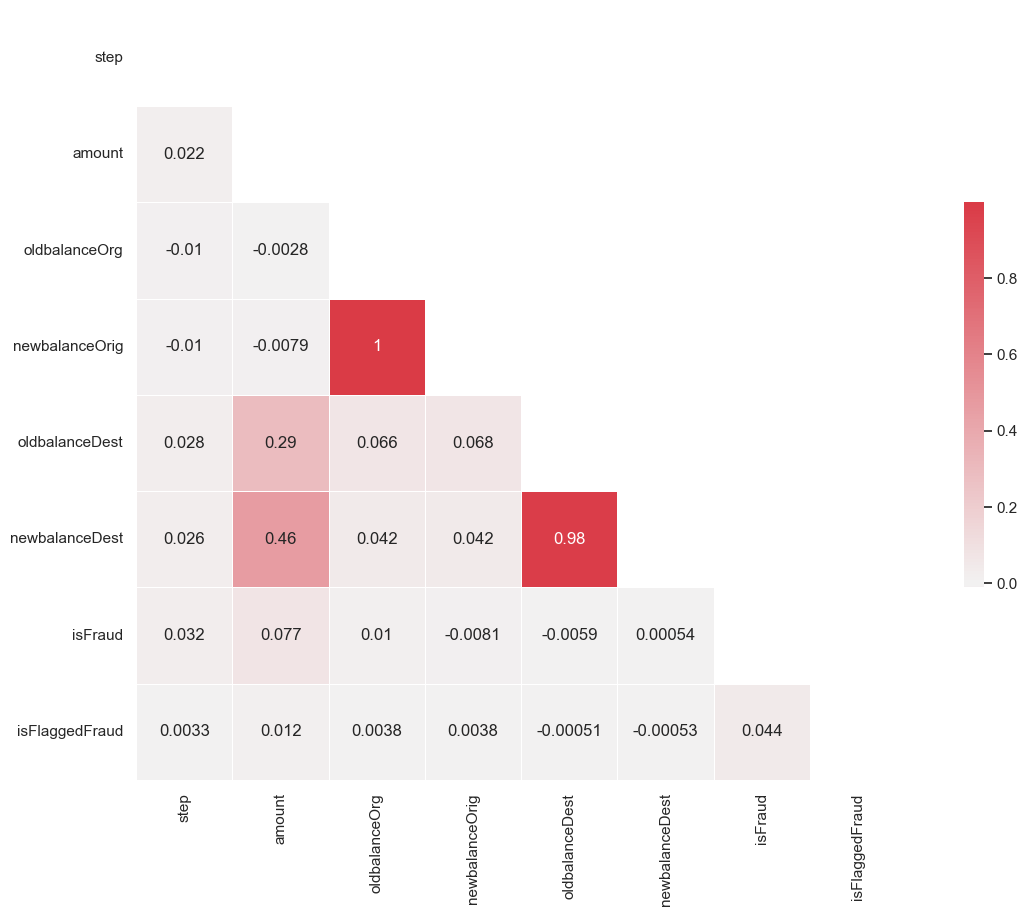

In [16]:
#correlations matrix
plt.figure(figsize=(15, 10))  

sns.set(style='white')    

mask=np.triu(np.ones_like(data.corr(), dtype=bool))    

cmap=sns.diverging_palette(0, 10, as_cmap=True)   


sns.heatmap(data.corr(),    
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

The target column is 'isFraud' so I need to check the correlations of the rest of the columns to that column. It seems that there are no high correlations at first sight. The highest is column 'amount' with 0.077, followed by 'step' with 0.032, then 'oldbalanceOrg' with 0.01, then 'newbalanceOrig' with -0,0081, followed by 'oldbalanceDest' with -0.0059 and lastly 'newbalanceDest' with 0.00054